## Visualizaciones de datos en Python (Parte I)

# Objetivos

1. Graficar datos en Python.
2. Uso básico de las librerías más utilizadas: Matplotlib y Seaborn.

## 1. Paquete `matplotlib`

Es la librería más ampliamente utilizada en Python para la visualización. Es además el constructo básico de graficación de muchas otras librerías de uso común. Es posible compararla con `numpy` en el sentido que ha servido de piedra angular para integrar otras herramientas útiles.

In [1]:
# Importación de paquetes
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 1.1. Declarar una visualización

Para declarar una visualización utilizamos el método `subplots` del módulo `matplotlib.pyplot`. Este nos permite crear un objeto de tipo `figure` (`fig`) para establecer el lienzo sobre el cual colocaremos un gráfico y un objeto de tipo `axes`(`ax`) que hace referencia a un gráfico. 

    fig, ax = plt.subplots()

Asimismo, podemos colocar más de un gráfico en un mismo lienzo. Para esto, ingresamos por parámetro el número de filas (`n`) y el número de columnas (`m`) en las que queremos dividir el lienzo. 

    fig, ax = plt.subplots(n,m)

#### Ejemplo
Grafiquemos una línea que una los puntos con coordenadas (x,y) = (1, 2) y (x,y) = (3, 4).<br>
* coordenadas en el eje x (ordenada) = (1,3)
* coordenadas en el eje y (abscisa) = (2,4)

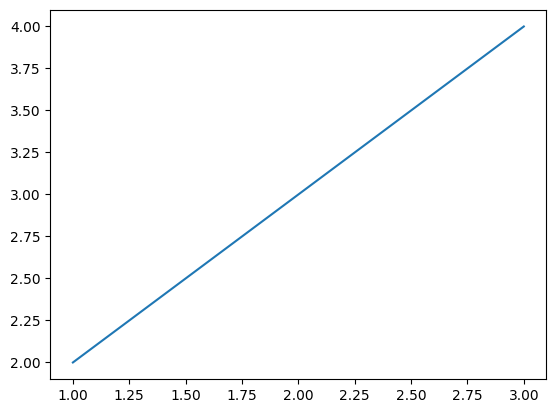

In [2]:
# Ploteamos el ejemplo:

fig, ax = plt.subplots()
ax.plot([1, 3], [2, 4])
plt.show()

### 1.2. Métodos para editar los gráficos
A continuación, presentamos los principales métodos para editar un objeto de tipo `axes`.

| <center>Método<center> | <center>Descripción<center> | 
| :--- | :--- | 
| `set_xscale` | Establece la escala del eje x |
| `set_yscale` | Establece la escala del eje y |
| `set_axis_off` | Elimina los ejes del gráfico|
| `set_xlim` | Establece límites para el rango del eje x |
| `set_ylim` | Establece límites para el rango del eje y |
| `set_xticks` | Establece cuales valores del eje x tendrán una etiqueta |
| `set_yticks` | Establecemos cuales valores del eje y tendrán una etiqueta |
| `set_xticklabels` | Establece los valores de las etiquetas de datos del eje x |
| `set_yticklabels` | Establece los valores de las etiquetas de datos del eje y |
| `set_title` | Agrega un título al gráfico |
| `legend` | Agrega una leyenda al gráfico|
| `twinx` | Genera un segundo eje vertical a la derecha del gráfico|
| `twiny` | Genera un segundo eje horizontal arriba del gráfico|
| `grid` | Agrega una grilla al gráfico cuando toma el valor `True`|

#### Ejemplo usando un Objeto de tipo `dataframe`

In [3]:
# Importación de datos sobre precipitaciones:

df_lluvias = pd.read_csv('...\\pune_1965_to_2002.csv')      # Cargamos la base de datos
df_lluvias.index = df_lluvias['Year']                       # Definimos 'Year' como índice
df_lluvias = df_lluvias.drop('Year', axis='columns')
df_lluvias.head()                                           # Mostramos las primeras 5 filas del DF

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1965,0.029,0.069,0.000,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1966,0.905,0.000,0.000,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132
1967,0.248,3.390,1.320,13.482,11.116,251.314,780.006,181.069,183.757,50.404,8.393,37.685
1968,0.318,3.035,1.704,23.307,7.441,179.872,379.354,171.979,219.884,73.997,23.326,2.020
1969,0.248,2.524,0.334,4.569,6.213,393.682,678.354,397.335,205.413,24.014,24.385,1.951


#### Ejemplo:  serie de tiempo de precipitaciones
Grafiquemos las precipitaciones acumuladas para los distintos años como una serie de tiempo:

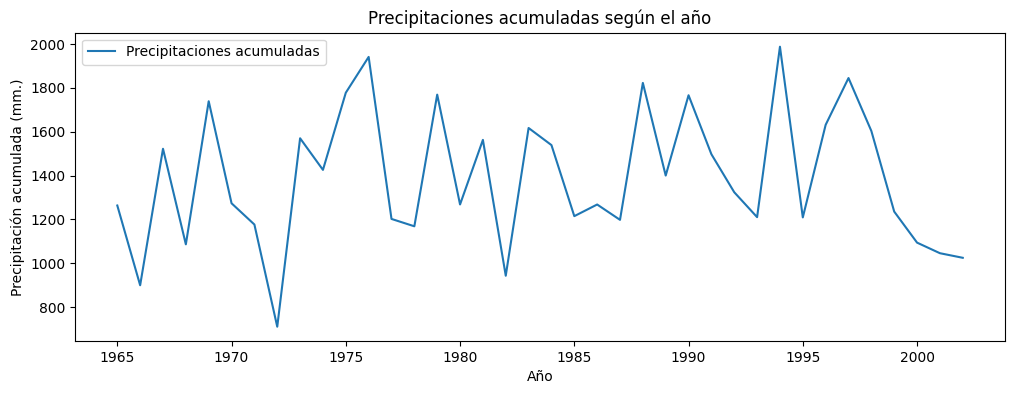

In [4]:
# A continuación, editamos el gráfico con los parámetros detallados en la tabla anterior:

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(df_lluvias.index ,df_lluvias.sum(axis='columns') , label='Precipitaciones acumuladas')
ax.set_xlabel('Año')
ax.set_ylabel('Precipitación acumulada (mm.)')
ax.set_title('Precipitaciones acumuladas según el año')
ax.legend()
plt.show()

#### Guardar gráficos para uso posterior
Es posible guardar gráficos en el equipo para uso posterior en formatos `.jpg`, `.pdf`, `.png` entre otros.

In [5]:
# Guardamos el gráfico anterior en formato .pdf:

fig.savefig("precipitaciones_año.pdf")

### 1.3. Tipos de visualización
La siguiente tabla asocia algunos de los métodos del objeto `ax` con el respectivo tipo de visualización que genera.

| <center>Método | <center>Tipo de visualización | 
| :--- | :--- | 
| `scatter` | Gráfico de dispersión |
| `plot` | Gráfico de línea |
| `hist` | Histogramas |
| `bar` | Gráfico de barras |

### 1.3.1. Gráficos de Dispersión

Los gráficos de dispersión permiten comparar las interacciones entre variables. Esta interacción sirve como intuición para determinar correlaciones y tendencias.

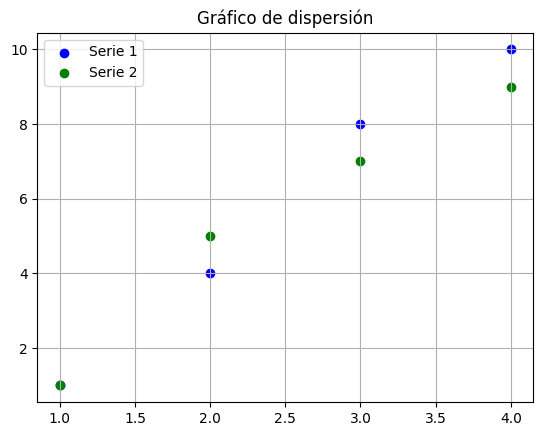

In [6]:
fig, ax = plt.subplots()                              # Declaramos la visualización.

# Serie de datos 1.
serie_1 = ax.scatter(                                
                     [1,2,3,4],                       # Declaramos las coordenadas del eje x.
                     [1,4,8,10],                      # Declaramos las coordenadas del eje y.
                     color='blue',                    # Modificamos el color de los puntos.
                     label='Serie 1'                  # Definimos un nombre para la serie 1.
                     )    
# Serie de datos 2.
serie_2 = ax.scatter(                                
                     [1,2,3,4],                       # Declaramos las coordenadas del eje x.
                     [1,5,7,9],                       # Declaramos las coordenadas del eje y.
                     color='green',                   # Modificamos el color de los puntos.
                     label='Serie 2'                  # Definimos un nombre para la serie 2.
                   )

ax.set_xscale('linear')                               # Establecemos una escala lineal para el eje x.
ax.set_yscale('linear')                               # Establecemos una escala lineal para el eje y.
ax.set_title('Gráfico de dispersión')                 # Definimos un título para la visualización.
ax.grid(True)                                         # Agregamos una grilla al gráfico.
ax.legend()                                           # Modificamos el color del gráfico.

plt.show()                                            # Utilizamos el método show para mostrar la visualización.

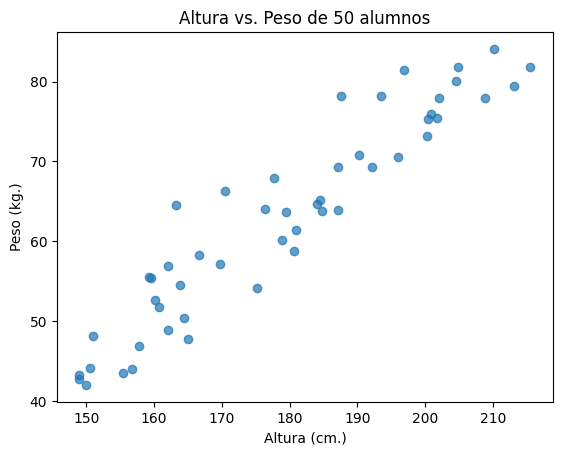

In [7]:
pesos   = [42.8, 43.3, 42. , 44. , 44.1, 43.5, 48.1, 48.9, 47.7,46.9,50.4,
           52.7, 51.8, 54.5, 54.2, 56.9, 55.4, 55.5, 57.1, 58.3, 63.7, 58.8,
           64.6, 60.2, 64. , 63.8, 61.4, 66.3, 64.7, 63.9, 69.3, 67.9, 65.2,
           70.8, 70.5, 69.3, 75.3, 75.5, 78.2, 78. , 73.2, 78. , 80.1, 78.2,
           76. , 81.5, 79.4, 81.8, 81.8, 84.1]
alturas = [149. , 149. , 149.9, 156.8, 150.6, 155.4, 151. , 162. , 165.,
           157.8, 164.4, 160.1, 160.8, 163.8, 175.2, 162. , 159.5, 159.2,
           169.8, 166.7, 179.4, 180.6, 163.3, 178.8, 176.3, 184.8, 181. ,
           170.5, 184.1, 187.1, 187.1, 177.7, 184.5, 190.3, 196. , 192.1,
           200.4, 201.8, 187.5, 202.1, 200.3, 208.8, 204.6, 193.5, 200.9,
           196.8, 213.1, 204.8, 215.5, 210.2] 

fig, ax = plt.subplots()
ax.scatter(alturas, pesos, alpha=0.7)
ax.set_title('Altura vs. Peso de 50 alumnos')
ax.set_xlabel('Altura (cm.)')
ax.set_ylabel('Peso (kg.)')
plt.show()

¿Guardarán algún tipo de relación las precipitaciones de Agosto respecto de las de septiembre?

Text(0, 0.5, 'Precipitaciones en Septiembre (mm.)')

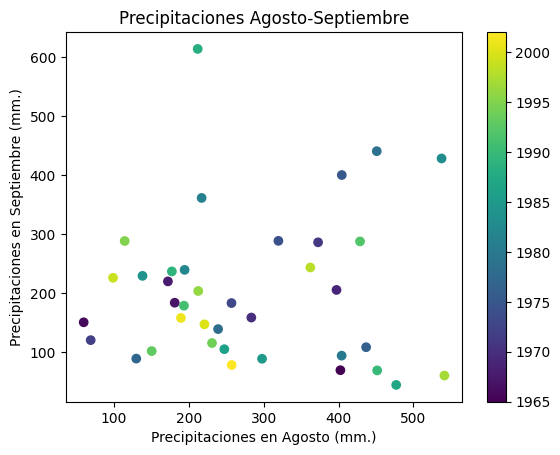

In [8]:
fig, ax = plt.subplots()  
mapeo_colores = ax.scatter(df_lluvias['Aug'], df_lluvias['Sep'], c=df_lluvias.index)

# Mapeamos las precipitaciones por año con una barra lateral: 
fig.colorbar(mapeo_colores)
ax.set_title('Precipitaciones Agosto-Septiembre')
ax.set_xlabel('Precipitaciones en Agosto (mm.)')
ax.set_ylabel('Precipitaciones en Septiembre (mm.)')

### 1.3.2. Gráfico de barras
Comparamos las ventas anuales (en USD) de dos productos durante los últimos 5 años. Para esto, creamos un gráfico de barras.

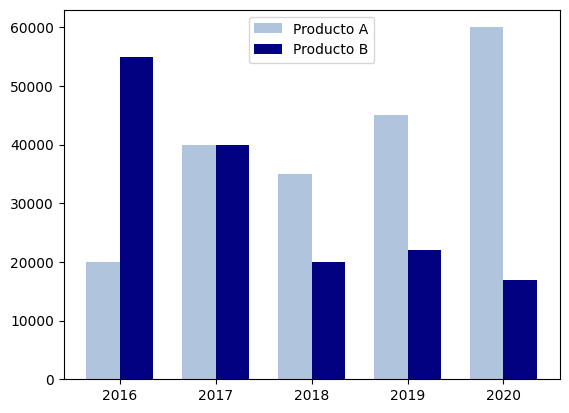

In [9]:
fig, ax = plt.subplots()                                   # Declaramos la visualización.
etiquetas = ['2016', '2017', '2018', '2019', '2020']       # Declaramos las etiquetas del eje x (años).
producto_a = [20000, 40000, 35000, 45000, 60000]           # Declaramos los registros de las ventas del producto A.
producto_b = [55000, 40000, 20000, 22000, 17000]           # Declaramos los registros de las ventas del producto B.
   
ancho = 0.35                                               # Definimos el ancho de las barras.
pos_bar_a = [i - ancho/2 for i in range(len(etiquetas))]   # Ubicación de cada barra en A.
pos_bar_b = [i + ancho/2 for i in range(len(etiquetas))]   # Ubicación de cada barra en B.
   
# Serie de datos correspondiente al producto A.   
serie_a = ax.bar(pos_bar_a,                                # Definimos la ubicación de cada barra.
                 producto_a,                               # Asignamos los registros correspondientes a las barras.
                 ancho,                                    # Asignamos el ancho de cada barra.
                 label = 'Producto A',                     # Definimos un nombre para la serie A.
                 color = 'lightsteelblue')                 # Modificamos el color de las barras. 
   
# Serie de datos correspondiente al producto B.   
serie_b = ax.bar(pos_bar_b,                                # Definimos la ubicación de cada barra.
                 producto_b,                               # Asignamos los registros del producto A a las barras.
                 ancho,                                    # Asignamos el ancho de cada barra.
                 label = 'Producto B',                     # Definimos un nombre para la serie A.
                 color = 'navy')                           # Modificamos el color de las barras.
   
ax.set_xticks([*range(len(etiquetas))])                    # Establecemos cuales valores del eje x tendrán una etiqueta.
ax.set_xticklabels(etiquetas)                              # Establecemos las etiquetas del eje x.
ax.legend()                                                # Declaramos la leyenda de los datos.
   
plt.show()                                                 # Utilizamos el método show para mostrar la visualización.

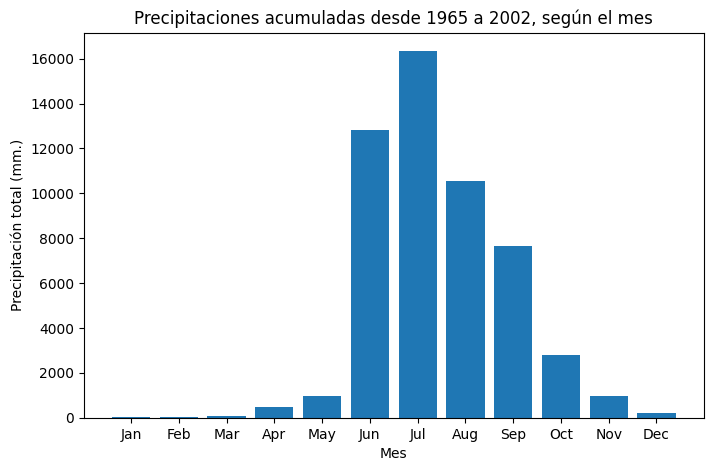

In [10]:
# Ploteamos las precipitaciones en gráfico de barras:

fig, ax = plt.subplots(figsize=(8,5))
precipitaciones_acumuladas = df_lluvias.sum()
ax.bar(df_lluvias.columns, precipitaciones_acumuladas)
ax.set_title('Precipitaciones acumuladas desde 1965 a 2002, según el mes')
ax.set_ylabel('Precipitación total (mm.)')
ax.set_xlabel('Mes')

plt.show()

### 1.3.3. Histograma
Los histogramas son gráficos que permiten conocer visualmente la distribución de los datos. Esto es muy útil para realizar inferencia estadística, y conocer anticipadamente características del conjunto de datos.

Utilizamos la función 'flatten' para crear una copia de un arreglo (bidimensional, en este caso) para colapsar el mismo en una arreglo de una dimensión:

In [11]:
df_lluvias.values.flatten()

array([2.90000e-02, 6.90000e-02, 0.00000e+00, 2.16670e+01, 1.78590e+01,
       1.02111e+02, 6.06071e+02, 4.02521e+02, 6.95110e+01, 5.24900e+00,
       1.62320e+01, 2.20750e+01, 9.05000e-01, 0.00000e+00, 0.00000e+00,
       2.98100e+00, 6.30080e+01, 9.40880e+01, 4.81942e+02, 5.93860e+01,
       1.50624e+02, 1.30800e+00, 4.12140e+01, 4.13200e+00, 2.48000e-01,
       3.39000e+00, 1.32000e+00, 1.34820e+01, 1.11160e+01, 2.51314e+02,
       7.80006e+02, 1.81069e+02, 1.83757e+02, 5.04040e+01, 8.39300e+00,
       3.76850e+01, 3.18000e-01, 3.03500e+00, 1.70400e+00, 2.33070e+01,
       7.44100e+00, 1.79872e+02, 3.79354e+02, 1.71979e+02, 2.19884e+02,
       7.39970e+01, 2.33260e+01, 2.02000e+00, 2.48000e-01, 2.52400e+00,
       3.34000e-01, 4.56900e+00, 6.21300e+00, 3.93682e+02, 6.78354e+02,
       3.97335e+02, 2.05413e+02, 2.40140e+01, 2.43850e+01, 1.95100e+00,
       7.00000e-02, 0.00000e+00, 1.00000e-03, 1.62180e+01, 6.80360e+01,
       3.00546e+02, 3.30502e+02, 2.83476e+02, 1.58640e+02, 1.157

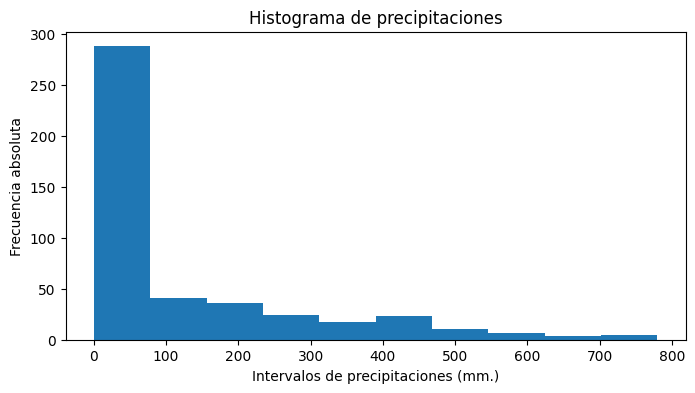

In [12]:
# Usamos la función 'flatten()' para transformar la matriz a un vector de 1 dimensión,
# Usamos la función 'bin()' -representación binaria- para dividir el gráfico en 10 rangos de números o bins: 

fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(df_lluvias.values.flatten(), bins=10)
ax.set_title('Histograma de precipitaciones')
ax.set_xlabel('Intervalos de precipitaciones (mm.)')
ax.set_ylabel('Frecuencia absoluta')
plt.show()

Text(0, 0.5, 'Frecuencia absoluta')

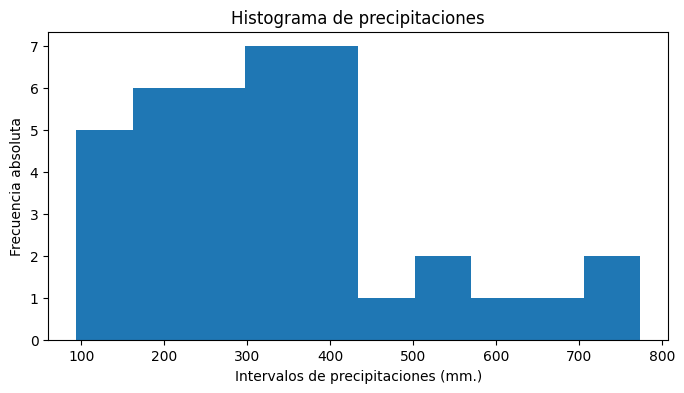

In [13]:
# Ahora, graficamos las lluvias correspondientes al mes de Junio:

fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(df_lluvias['Jun'])
ax.set_title('Histograma de precipitaciones')
ax.set_xlabel('Intervalos de precipitaciones (mm.)')
ax.set_ylabel('Frecuencia absoluta')

En estadística y probabilidad se llama distribución normal, distribución de Gauss, distribución gaussiana, distribución de Laplace-Gauss o normalidad estadística a una de las distribuciones de probabilidad de variable continua que con más frecuencia aparece en estadística y en la teoría de probabilidades. La gráfica de su función de densidad tiene una forma acampanada y es simétrica respecto de un determinado parámetro estadístico. Esta curva se conoce como campana de Gauss y es el gráfico de una función gaussiana.

La función de distribución de la distribución normal está definida como sigue:

$$
\begin{equation}

P(x) = \frac{1}{{\sigma \sqrt {2\pi } }} \: e^{-\frac{{(x - \mu )}^2}{2\sigma^2} }





\end{equation}
$$

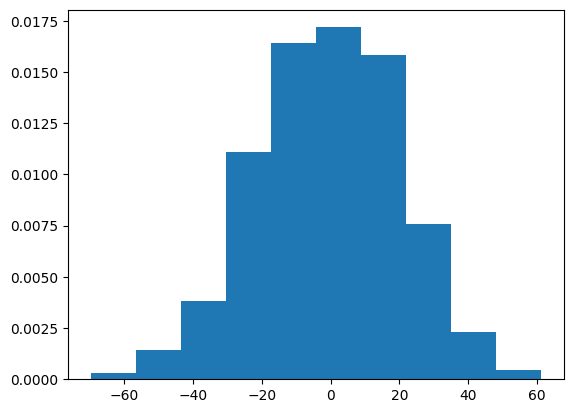

In [15]:
media = 0
varianza = 21
gaussiana = np.random.normal(media, varianza, 1000)
grafico = plt.hist(gaussiana, density=True)
plt.show()

### 1.4. Librería Seaborn

Este paquete permite realizar visualizaciones al igual que `matplotlib`, sin embargo, está optimizado para su uso conjunto a la librería `pandas`. Veamos un ejemplo del histograma anterior usando `seaborn`.

<AxesSubplot: ylabel='Count'>

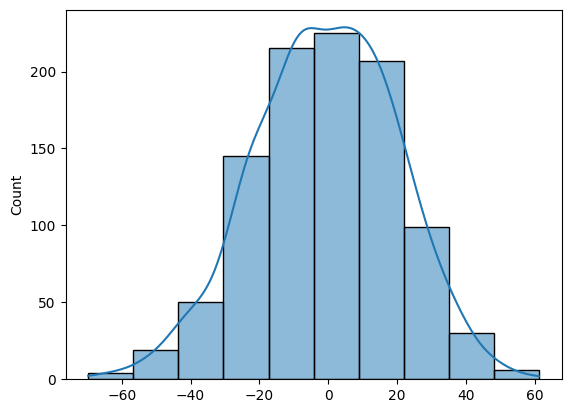

In [16]:
sns.histplot(data=gaussiana,bins = 10, kde=True)

## 2. Agregar elementos a los gráficos (customization)

En los gráficos es posible agregar distintos elementos de acuerdo con la necesidad de cada problema o el interés del analista que lo esté realizando.

<br> Comparemos las precipitaciones de Enero y Febrero en el mismo objeto ax:

In [18]:
# Obtener elementos máximos o límite:

maximo_enero = df_lluvias['Jan'].max()
print('El maximo de precipitación en Enero es:', maximo_enero)

maximo_febrero =  df_lluvias['Feb'].max()
print('El maximo de precipitación en Febrero es:', maximo_febrero)

El maximo de precipitación en Enero es: 3.013
El maximo de precipitación en Febrero es: 8.41


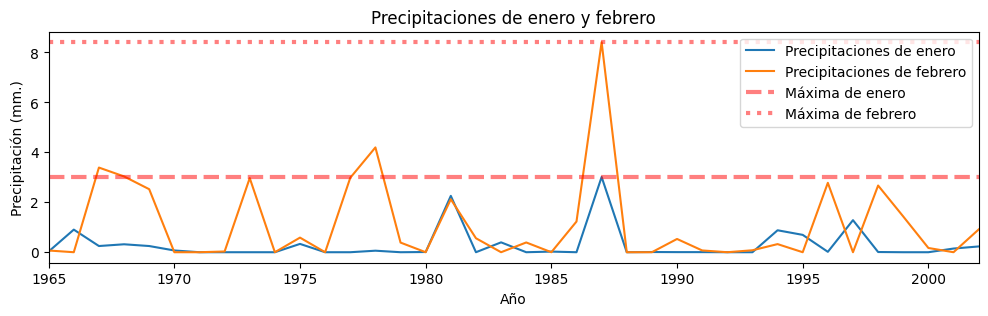

In [20]:
# Graficamos precipitaciones para los meses de Enero y Febrero:

fig, ax = plt.subplots(figsize=(12, 3))  
ax.plot(df_lluvias.index, df_lluvias['Jan'], label='Precipitaciones de enero')
ax.plot(df_lluvias.index, df_lluvias['Feb'], label='Precipitaciones de febrero', color='C1')

# Se agregan lineas horizontales con el comando axhline para los dos valores maximos encontrados antes
ax.axhline(maximo_enero, color='red', linestyle='--', alpha=0.5,    linewidth=3, label='Máxima de enero')
ax.axhline(maximo_febrero, color='red', linestyle=':', alpha=0.5, linewidth=3, label='Máxima de febrero')

# Incluir elementos descriptivos para el gráfico
ax.set_xlabel('Año')  
ax.set_ylabel('Precipitación (mm.)') 
ax.set_title('Precipitaciones de enero y febrero') 	
ax.set_xlim(df_lluvias.index[0], df_lluvias.index[-1])  #<- ¿que cambia?
ax.legend()
plt.show()